In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA
import csv

In [28]:
#Read Excel file in pandas
df = pd.read_excel('C:\\Users\\fleet\\Downloads\\Telegram Desktop\\Stage_2.xlsx')
print(df.isnull().sum())

Стадия ХСН                 0
3-OH Anthranillic acid    60
5-hydroxytryptophan       65
5-Methoxytryptamine       66
Adenosin                  67
                          ..
C5-OH                     63
C6                        66
C6-DC                     69
C8                        77
C8-1                      60
Length: 93, dtype: int64


In [29]:
df['Стадия ХСН'].replace(['Высокий риск СН','Стадия 1'],[0,1],inplace=True)
print(df.isnull().sum())

Стадия ХСН                 0
3-OH Anthranillic acid    60
5-hydroxytryptophan       65
5-Methoxytryptamine       66
Adenosin                  67
                          ..
C5-OH                     63
C6                        66
C6-DC                     69
C8                        77
C8-1                      60
Length: 93, dtype: int64


In [30]:
x = df.iloc[:,1:]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
non = imputer.fit_transform(x)
x = pd.DataFrame(non, columns=x.columns)

y = df.iloc[:,0]
df = pd.concat([y,x],axis=1)
print(df)

     Стадия ХСН  3-OH Anthranillic acid  5-hydroxytryptophan  \
0             0                0.032595            -0.921570   
1             0                0.004675            -1.500937   
2             0               -0.028697            -0.921570   
3             0               -0.029207            -0.921570   
4             0                0.135858            -1.618624   
..          ...                     ...                  ...   
233           1                0.007491            -1.025408   
234           1               -0.014912            -0.908399   
235           1               -0.001810            -0.921570   
236           1               -0.027353            -0.921570   
237           1               -0.014912            -1.635258   

     5-Methoxytryptamine  Adenosin      ADMA    Alanine  Antranillic acid  \
0              -0.079196 -0.006724  0.104690  38.271151         -0.220099   
1              -0.061010 -0.000990  0.032387  11.061777         -0.312977   


In [31]:
print('\nВысокий риск СН', sum(df['Стадия ХСН'] == 0),\
        '\nСтадия 1', sum(df['Стадия ХСН'] == 1))


Высокий риск СН 121 
Стадия 1 117


In [32]:
df.to_csv('D:\\Documents\\phenotype.csv', index= True, quoting=csv.QUOTE_NONNUMERIC)
#Data visualization
y.value_counts()

0    121
1    117
Name: Стадия ХСН, dtype: int64

In [33]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_norm = sc.fit_transform(x)
x_norm = pd.DataFrame(x_norm, columns=x.columns)
x_norm.describe()

,3-OH Anthranillic acid,5-hydroxytryptophan,5-Methoxytryptamine,Adenosin,ADMA,Alanine,Antranillic acid,Arginine,Asparagine,Aspartic acid,...,C3,C4,C5,C5-1,C5-DC,C5-OH,C6,C6-DC,C8,C8-1
count,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,...,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02,2.380000e+02
mean,-3.731842e-17,2.798882e-17,5.970947e-17,2.686926e-16,-2.239105e-17,-7.463684e-17,2.276424e-16,2.985474e-17,3.731842e-17,-6.717316e-17,...,-2.985474e-17,3.731842e-18,-4.478211e-17,4.478211e-17,-1.865921e-17,5.970947e-17,-2.612289e-17,-1.194189e-16,3.918434e-17,2.052513e-17
std,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,...,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00,1.002107e+00
min,-7.412489e-01,-1.213627e+00,-1.642458e+00,-1.748458e+00,-2.039218e+00,-2.068163e+00,-9.625249e-01,-1.983771e+00,-1.822859e+00,-1.936435e+00,...,-1.856166e+00,-1.687107e+00,-1.918396e+00,-1.781898e+00,-1.735315e+00,-2.158991e+00,-1.829643e+00,-1.135364e+00,-1.808249e+00,-1.298537e+00
25%,-5.686868e-01,-6.504053e-01,-6.231983e-01,-5.910607e-01,-7.784199e-01,-6.128667e-01,-5.357528e-01,-6.021969e-01,-5.664993e-01,-7.438755e-01,...,-6.866431e-01,-5.687053e-01,-6.879251e-01,-7.137965e-01,-6.662853e-01,-6.278238e-01,-6.373595e-01,-5.889138e-01,-4.746719e-01,-5.604629e-01
50%,-3.786896e-01,-2.500381e-01,-1.653784e-01,-1.381189e-01,1.103298e-02,-1.145863e-01,-3.017505e-01,-6.877969e-02,-1.259996e-01,-6.539869e-02,...,-8.818107e-02,-1.405495e-01,-3.809426e-02,-3.732284e-02,-1.780166e-01,7.240460e-02,-1.498430e-01,-3.310362e-01,-1.208010e-01,-2.639004e-01
75%,-2.145618e-02,4.459079e-01,5.266596e-01,4.633709e-01,6.078941e-01,4.246389e-01,-1.158100e-02,5.012624e-01,4.105133e-01,4.487653e-01,...,5.318572e-01,4.581669e-01,6.205330e-01,5.011483e-01,5.138113e-01,5.512577e-01,4.366192e-01,1.234538e-01,4.501095e-01,1.844927e-01
max,4.177331e+00,3.344939e+00,2.158258e+00,2.398921e+00,2.337561e+00,2.308952e+00,3.745419e+00,2.549689e+00,2.924857e+00,2.467619e+00,...,2.524353e+00,2.841555e+00,2.473936e+00,2.509172e+00,2.624718e+00,1.821302e+00,2.662223e+00,3.006811e+00,2.654928e+00,3.523387e+00


In [34]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size=0.2,random_state=0)

In [36]:
#Performing models
models ={
    'Decision Tree':DecisionTreeClassifier(random_state=0),
    'Random Forest':RandomForestClassifier(random_state=0),
    'KNN':KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=0),
    'SVM': SVC(random_state=0)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=3)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted', zero_division= 0)
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted', zero_division= 0)
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
   
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print('='*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')


Decision Tree
CV mean score: 0.60 (+/- 0.09)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.5417
F1 Score: 0.5344
Precision: 0.5444
Recall: 0.5417




Random Forest
CV mean score: 0.74 (+/- 0.22)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.6667
F1 Score: 0.6667
Precision: 0.6667
Recall: 0.6667


KNN
CV mean score: 0.70 (+/- 0.07)
Model performance for Training set:
Accuracy: 0.8421
F1 Score: 0.8410
Precision: 0.8492
Recall: 0.8421
-----------------------------------
Model performance for Test set:
Accuracy: 0.5833
F1 Score: 0.5767
Precision: 0.5889
Recall: 0.5833


Gradient Boosting
CV mean score: 0.70 (+/- 0.21)
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.6667
F1 Score: 0.6667
Precision: 0.6667
Recall: 0.6667


SVM
CV mean score: 0.78 (+/- 0.22)
Model performance for Training set:
Accuracy: 0.9737
F1 Score: 0.9737
Precision: 0.9750
Recall: 0.9737
-------------

In [37]:
#Hyperparamenter Training
rf_params = {'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'criterion':  ['gini', 'entropy'],
              'min_samples_leaf': [1, 2, 4],
              'class_weight': ['balanced', None]}
dt_params = { 'max_depth': [5,8,15, None, 10],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20],
              'min_samples_leaf': [1, 2, 4],
              'criterion':  ['gini', 'entropy']}
KNN_params = {'n_neighbors': [3,5,10],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'metric': ['euclidean', 'manhattan'],
              'leaf_size': [20, 50, 100]}
GB_params = {'max_depth': [3,5,8,15, None],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 200, 500],
              'loss': ['log_loss'],
              'criterion':  ['squared_error', 'friedman_mse'],
              'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'max_leaf_nodes': [5, 10, 20]}
SVC_params = {'C': [1, 10, 100, 1000],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'gamma': ['scale', 'auto'],
              'decision_function_shape': ['ovo', 'ovr'],
              'class_weight': ['balanced', None]}
grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}


In [39]:
""" #RandomizedSearchCV hyperparameters pulling methods 
model_param = {}
for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator = model,\
                                param_distributions = params,\
                                cv =3,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name]) """

' #RandomizedSearchCV hyperparameters pulling methods \nmodel_param = {}\nfor name,model,params in randomcv_models:\n    random = RandomizedSearchCV(estimator = model,                                param_distributions = params,                                cv =3,                                verbose=2,                                n_jobs=-1)\n    random.fit(x_train,y_train)\n    model_param[name] = random.best_params_\n    \nfor model_name in model_param:\n    print(f"---------Best Params for {model_name}---------")\n    print(model_param[model_name]) '

In [40]:
svc_models = [('SCV', SVC(), SVC_params),
] 

In [41]:
""" #SCV hyperparameters pulling methods 
model_param = {}
for name,model,params in svc_models:
    random = GridSearchCV(estimator = model,\
                               param_grid = params,\
                                cv =5,\
                                verbose=2,\
                                n_jobs=-1)
    random.fit(x_train,y_train)
    model_param[name] = random.best_params_
    
for model_name in model_param:
    print(f"---------Best Params for {model_name}---------")
    print(model_param[model_name]) """

' #SCV hyperparameters pulling methods \nmodel_param = {}\nfor name,model,params in svc_models:\n    random = GridSearchCV(estimator = model,                               param_grid = params,                                cv =5,                                verbose=2,                                n_jobs=-1)\n    random.fit(x_train,y_train)\n    model_param[name] = random.best_params_\n    \nfor model_name in model_param:\n    print(f"---------Best Params for {model_name}---------")\n    print(model_param[model_name]) '

In [52]:
#Performing models
models ={
    'Random Forest':RandomForestClassifier(random_state = 0, n_estimators = 200, min_samples_split= 2, criterion = 'entropy',class_weight= 'balanced'),
    'Gradient Boosting':GradientBoostingClassifier(random_state=0, max_depth = 5, min_samples_split= 2, n_estimators = 300, loss = 'log_loss', criterion = 'squared_error', max_features = 'log2', min_samples_leaf= 2)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train,y_train)
    skfold=StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    scores = cross_val_score(model, x_norm, y, cv=skfold)

    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
        #Test performance
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_precision = precision_score(y_test,y_test_pred, average='weighted', zero_division= 0)
    model_test_recall = recall_score(y_test,y_test_pred, average='weighted')
    model_test_f1 = f1_score(y_test,y_test_pred, average='weighted')

        #Train performance
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_precision = precision_score(y_train,y_train_pred, average='weighted', zero_division= 0)
    model_train_recall = recall_score(y_train,y_train_pred, average='weighted')
    model_train_f1 = f1_score(y_train,y_train_pred, average='weighted')
    
    print('='*35)
    print(list(models.keys())[i])

    print("CV mean score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    print('-'*35)

    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}'.format(model_train_recall))

    print('-'*35)

    print('Model performance for Test set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))

    print('='*35)
    print('\n')

Random Forest
CV mean score: 0.76 (+/- 0.18)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7083
F1 Score: 0.7078
Precision: 0.7098
Recall: 0.7083


Gradient Boosting
CV mean score: 0.76 (+/- 0.15)
-----------------------------------
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000
-----------------------------------
Model performance for Test set:
Accuracy: 0.7083
F1 Score: 0.7078
Precision: 0.7098
Recall: 0.7083




In [55]:
GB = GradientBoostingClassifier(random_state=0, max_depth = 15, min_samples_split= 2,\
                                n_estimators = 100, loss = 'log_loss', criterion = 'squared_error',\
                                max_features = 'log2', min_samples_leaf= 2)
GB.fit(x_train,y_train)
proba = GB.predict_proba(x_test)
predicted = GB.predict(x_test)
proba_r = np.round(proba, decimals=3)
y_test_groups = list(y_test)
for i in range(len(y_test_groups)):
    print('Probability of class {}'.format(proba_r[i]*100))
    print('Predicted class: {}'.format(predicted[i]))
    print('Real class: {}'.format(y_test_groups[i]))
    print('\n')

Probability of class [ 2.6 97.4]
Predicted class: 1
Real class: 1


Probability of class [ 5.3 94.7]
Predicted class: 1
Real class: 1


Probability of class [97.8  2.2]
Predicted class: 0
Real class: 0


Probability of class [46.6 53.4]
Predicted class: 1
Real class: 0


Probability of class [ 2.4 97.6]
Predicted class: 1
Real class: 1


Probability of class [98.1  1.9]
Predicted class: 0
Real class: 1


Probability of class [ 0.5 99.5]
Predicted class: 1
Real class: 1


Probability of class [ 1.7 98.3]
Predicted class: 1
Real class: 1


Probability of class [100.   0.]
Predicted class: 0
Real class: 0


Probability of class [ 5.1 94.9]
Predicted class: 1
Real class: 1


Probability of class [89.5 10.5]
Predicted class: 0
Real class: 0


Probability of class [ 6.2 93.8]
Predicted class: 1
Real class: 1


Probability of class [ 7.8 92.2]
Predicted class: 1
Real class: 1


Probability of class [25.4 74.6]
Predicted class: 1
Real class: 0


Probability of class [ 1.3 98.7]
Predicted class

In [56]:
#Classificatio report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.65      0.71      0.68        24

    accuracy                           0.67        48
   macro avg       0.67      0.67      0.67        48
weighted avg       0.67      0.67      0.67        48



In [57]:
#AUC ROC
roc = roc_auc_score(y_test, predicted)
print(roc)

0.6666666666666667


In [58]:
from pycm import ConfusionMatrix
y_test = np.array(y_test)
predicted = np.array(predicted)
cm = ConfusionMatrix(actual_vector=y_test,predict_vector=predicted)
print(cm)

Predict  0        1        
Actual
0        15       9        

1        7        17       





Overall Statistics : 

95% CI                                                            (0.53331,0.80003)
ACC Macro                                                         0.66667
ARI                                                               0.09192
AUNP                                                              0.66667
AUNU                                                              0.66667
Bangdiwala B                                                      0.44618
Bennett S                                                         0.33333
CBA                                                               0.63942
CSI                                                               0.3345
Chi-Squared                                                       5.37063
Chi-Squared DF                                                    1
Conditional Entropy                                            

In [59]:
#SHAP
import shap
shap.initjs()

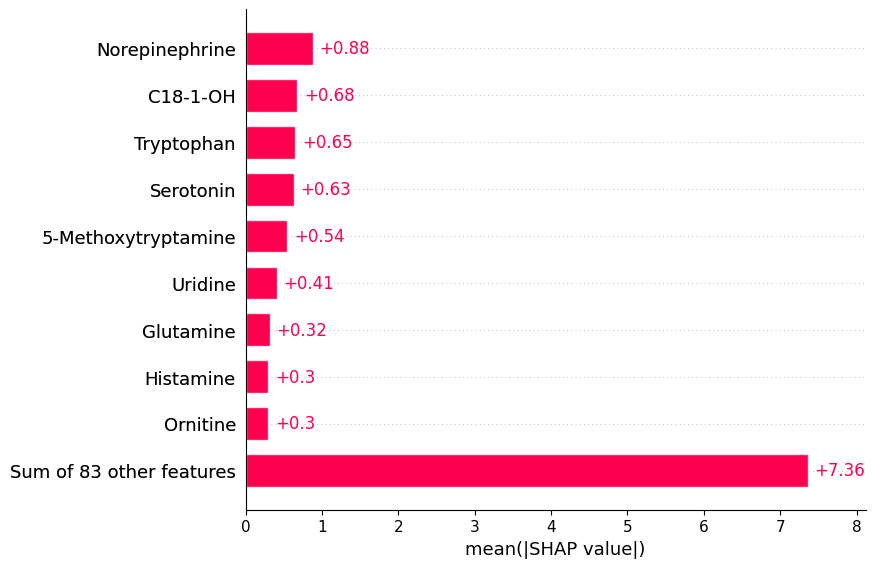

In [62]:
explainer = shap.Explainer(GB)
shap_values = explainer(x_test)
shap.plots.bar(shap_values)

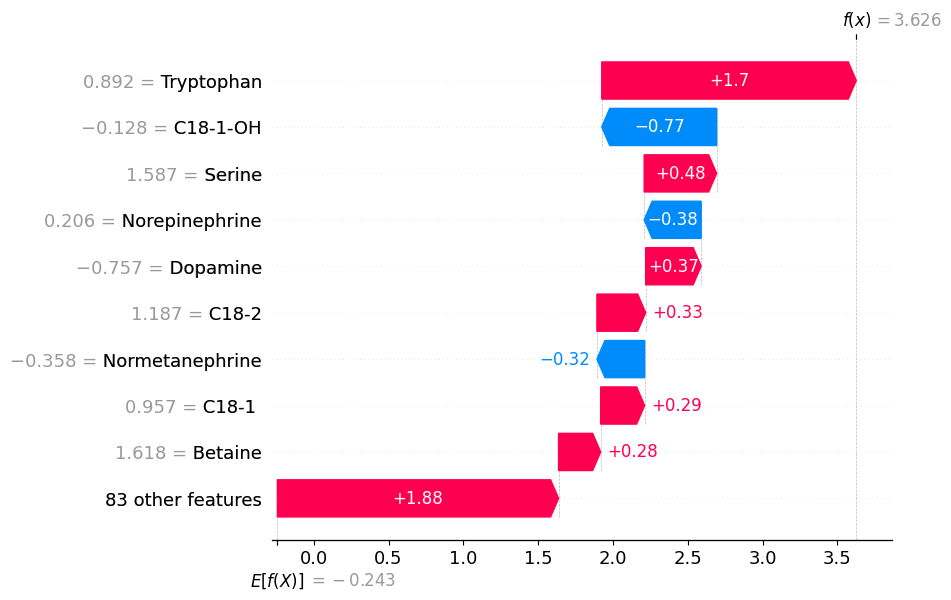

In [ ]:
shap.plots.waterfall(shap_values[0])

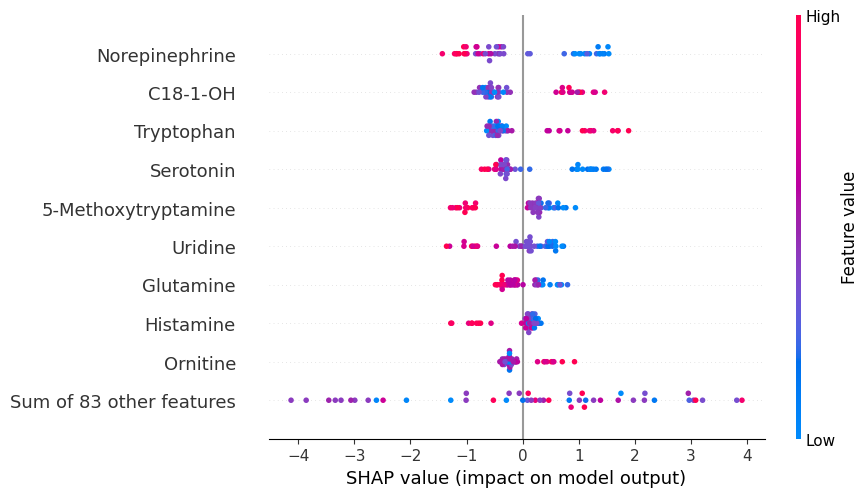

In [ ]:
shap.plots.beeswarm(shap_values)